In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import mnist # 같은 디렉토리 내에 있ㄴ느 파일들 불러오는 코드
from tensorflow.keras.utils import to_categorical # 원 핫 인코딩 하는 함수

In [3]:
# 학습용과 테스트용 데이터 나눠서 받아옴
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 28*28 사이즈의 이미지 6만개
print(x_train.shape)

(60000, 28, 28)


In [4]:
# normalization 하지 않았으므로 0~255 사이의 값을 가짐
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
# 0~255 사이의 값을 0~1 사이의 값으로 Normalization
def convertData(x):
    x = np.array(x/255.0, dtype=np.float32)
    return x

In [6]:
# Normalization
x_train = convertData(x_train)
x_test = convertData(x_test)

# 원 핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# 데이터 확인, 0~1값으로 변경된 것을 알 수 있음
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# 데이터 확인, 원 핫 인코딩 된 것을 알 수 있음
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dropout, Dense, Activation, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

IMAGE_SIZE = len(x_train[0])

# input으로 28*28*1(흑백)의 크기를 가짐
input = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

# Conv2D 함수로 데이터의 특징 추출
# 필터 32개 사용해 특징맵 32개 생성, 커널 사이즈 (3,3), padding=same으로 설정하여 이미지 사이즈 유지 
output = Conv2D(filters=32, kernel_size=(3,3), padding='same')(input)

#배치 정규화
# 각 배치의 데이터를 평균 0, 분산 1로 정규화
output = BatchNormalization()(output)
output = Activation('relu')(output)


output = Conv2D(filters=32, kernel_size=(3,3), padding='same')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)

# 커진 특징맵 크기를 줄여 계샨량 감소, 과적합 방지
output = MaxPooling2D(pool_size=(2,2))(output)


output = Conv2D(filters=64, kernel_size=(3,3), padding='same')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)


output = Conv2D(filters=64, kernel_size=(3,3), padding='same')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)
output = MaxPooling2D(pool_size=2)(output)


output = Conv2D(filters=128, kernel_size=3, padding='same')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)


output = Conv2D(filters=128, kernel_size=3, padding='same')(output)
output = BatchNormalization()(output)
output = Activation('relu')(output)
output = MaxPooling2D(pool_size=2)(output)

# 은닉층 쌓기 전에 데이터 1차원으로 변경
output = Flatten(name='flatten')(output)

# 과적합 방지
# 30%의 뉴런 무작위로 선택해 비활성화
output = Dropout(rate=0.3)(output)
# 은닉층 쌓음
output = Dense(300, activation='relu', name='fc1')(output)
output = Dropout(rate=0.3)(output)

# 10개 중에 하나의 답을 고르는 것이므로 마지막 레이어의 활성화 함수는 softmax
output = Dense(10, activation='softmax', name='output')(output)

model = Model(inputs = input, outputs = output)

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
np.random.seed(2020)
tf.random.set_seed(2020)

# patience동안 val_loss의 값이 변화가 없으면 학습률을 factor만큼 줄임
# val_loss가 더 이상 작아지지 않으면 학습률을 줄여서 과적합 방지
learning_rate_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience= 3, mode='min', verbose=1)

# patience 동안 val_loss의 값이 변화가 없으면 학습 중단
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# optimizer로 Adam사용
# 원 핫 인코딩을 했으므로 categorical crossentropy 사용
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 검증 데이터를 훈련 데이터에서 0.2만큼 추출하여 사용
# callback 함수로 학습률 조정 함수와, 미리 멈추는 함수 사용
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2, callbacks=[learning_rate_cb, earlystop_cb])

Epoch 1/50
1500/1500 [==============================] - 149s 100ms/step - loss: 0.1615 - accuracy: 0.9506 - val_loss: 0.0551 - val_accuracy: 0.9843
Epoch 2/50
1500/1500 [==============================] - 154s 103ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 3/50
1500/1500 [==============================] - 154s 103ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0317 - val_accuracy: 0.9907
Epoch 4/50
1500/1500 [==============================] - 156s 104ms/step - loss: 0.0392 - accuracy: 0.9883 - val_loss: 0.0510 - val_accuracy: 0.9852
Epoch 5/50
1500/1500 [==============================] - 154s 103ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9898
Epoch 6/50
1500/1500 [==============================] - 155s 103ms/step - loss: 0.0283 - accuracy: 0.9918 - val_loss: 0.0274 - val_accuracy: 0.9920
Epoch 7/50
1500/1500 [==============================] - 159s 106ms/step - loss: 0.0237 - accuracy: 0.9927 - val_

313/313 [==============================] - 8s 25ms/step - loss: 0.0199 - accuracy: 0.9957


[0.019850514829158783, 0.9957000017166138]

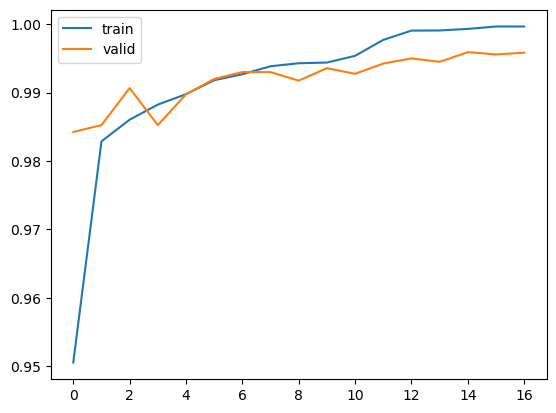

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# 검증 데이터와 학습 데이터의 학습 과정 그래프
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

# 성능 평가 테스트
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss : ', test_loss)
print('Test accuracy : ', test_acc)